# MNIST Single Layer Network with TensorBoard

Note: This notebook is desinged to run with Python3 and GPU runtime.<br>

Modified for local (off-line) mode with Python 3.x, TensorFlow 1.x (or 2.x), with or without GPU<br>
2020/02/04: By H.Nishiyama<br>

This notebook rewrite for local (off-line) TensorFlow 1.x (or 2.x).<br>
*If you use on online-colaboratory system, remove "###" from the top of lines in code cells. <br>
Original notebook uses TensorFlow 2.x.

In [1]:
###%tensorflow_version 2.x

####[MST-01]
Import modules and set random seeds.

In [2]:
import numpy as np
import shutil
  
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, callbacks
from tensorflow.keras.datasets import mnist

np.random.seed(20190228)
#--- For TensorFlow 1.x, use the following line, but if you use TensorFlow2.x, you need to comment it out.
tf.random.set_random_seed(20190228)
#--- For TensorFlow 2.x, use following line, instead of upper line.
###tf.random.set_seed(20190228)

####[MST-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MST-03]
Define a model with a single hidden layer.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ... 

In [4]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


####[MST-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[For local (off-line), windows system only!!]<br>
Check the contents of /tmp/log directory<br>
If you have important contents in /tmp/log directory, please move them to other directory.

In [6]:
!tree /A /F \tmp\log

フォルダー パスの一覧:  ボリューム XX
ボリューム シリアル番号は xxxx-xxxx です
C:\TMP\LOG
|   events.out.tfevents.1580845193.xxxxxxxx
|   events.out.tfevents.1580845193.xxxxxxxx.profile-empty
|   
\---plugins
    \---profile
        \---2020-02-05_04-39-53
                local.trace
                


####[MST-05]
Train the model with the callbacks option to store training logs.

In [7]:
# For online-colaboratory system, remove "###" from the top of following line.
###log_dir = '/tmp/log'
# For online-colaboratory system, add "###" to the top of following line. 
log_dir = '\\tmp\\log'
shutil.rmtree(log_dir, ignore_errors=True)

tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir,
                                             histogram_freq=1)
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10,
                    callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.2344 - acc: 0.9323 - val_loss: 0.1186 - val_acc: 0.9637
Epoch 2/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0914 - acc: 0.9736 - val_loss: 0.0814 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0564 - acc: 0.9837 - val_loss: 0.0700 - val_acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0378 - acc: 0.9887 - val_loss: 0.0694 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0273 - acc: 0.9921 - val_loss: 0.0694 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0189 - acc: 0.9947 - val_loss: 0.0610 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0135 - acc: 0.9964 

####[MST-06]
Install ngrok to run TensorBoard on Colaboratory.<br>
*For online-colaboratory system, remove "###" from the top of following line.

In [8]:
###!curl -OL https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
###!unzip -o ngrok-stable-linux-amd64.zip

####[MST-07]
Start TensorBoard and prepare the connection URL.<br>
*For online-colaboratory system, remove "###" from the top of following line.

In [9]:
###get_ipython().system_raw(
###    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
###    .format(log_dir)
###)
###get_ipython().system_raw('./ngrok http 6006 &')
###!curl -s http://localhost:4040/api/tunnels | python3 -c \
###    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

For windows10, open the terminal window by Jupyter's "new->terminal".<br>
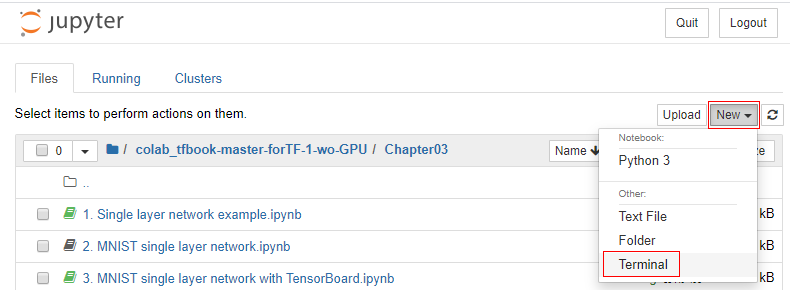

And following command execute on the shell(terminal) window.

> tensorboard --logdir "\tmp\log"

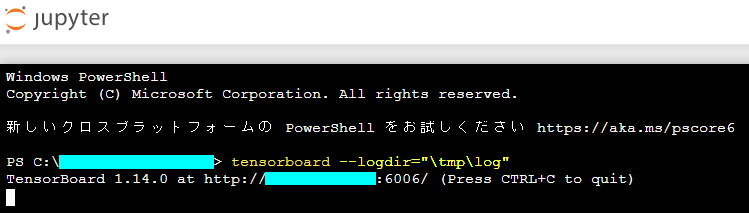

Then, open follow URL.

http://localhost:6006/
<br><br>
or displayed URL shown in avobe shell(terminal) window.